In [76]:
import os
import pandas as pd
from tqdm import tqdm
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import math

backup_root_dir = 'archive/tennis_abstract_dfs copy'
df_root_dir = 'tennis_abstract_dfs'
save_root_dir = backup_root_dir
surfs = ['Clay', 'Grass', 'Hard']
swr_baseline = 63.5
rwr_baseline = 36.5


In [77]:
all_names = []
for file in tqdm(os.listdir(df_root_dir)):
    name = file[:-4]
    all_names.append(name)

print(len(all_names))
    

top_200_names = []
for file in tqdm(os.listdir(df_root_dir)):
    name = file[:-4]
    file_name = f'{df_root_dir}/{file}'
    p_df = pd.read_pickle(f'{df_root_dir}/{file}')
    latest_rank = p_df['rank'].iloc[-1]
    if latest_rank:
        latest_rank = int(latest_rank)
        if latest_rank < 200:
            top_200_names.append(name)
len(top_200_names)

100%|██████████| 380/380 [00:00<?, ?it/s]


380


100%|██████████| 380/380 [00:00<00:00, 965.95it/s]


195

In [78]:
def first_values(row, player, shot):
    c = 400
    gg_swr = 0.6
    # gg_rwr = 0.4
    gb_swr = 0.8
    gb_rwr = 0.5
    gb_wr = 0.95
    good_ps = good_po = 2200
    rank_drop_rate = 134 
    good_pr = good_ps - c*math.log10(gg_swr/(1-gg_swr))
    bad_pr = good_ps - c*math.log10(gb_swr/(1-gb_swr))
    bad_ps = good_pr - c*math.log10(gb_rwr/(1-gb_rwr))
    bad_po = good_po - c*math.log10(gb_wr/(1-gb_wr))
    
    rnk = row['rank'] if player == 'p' else row['orank']
    if shot == 'r':
        return bad_pr + (good_pr - bad_pr) * np.exp(-int(rnk)/rank_drop_rate) if rnk else bad_pr
    elif shot == 'o':
        return bad_po + (good_po - bad_po) * np.exp(-int(rnk)/rank_drop_rate) if rnk else bad_po
    else:
        return bad_ps + (good_ps - bad_ps) * np.exp(-int(rnk)/rank_drop_rate) if rnk else bad_ps

    
def first_values_from_last(df, ranking_name):
    assert ranking_name in df.columns, f"Ranking name '{ranking_name}' not found in DataFrame columns."
    last_row = df.iloc[-1]
    return last_row[ranking_name]

In [79]:
def remove_duplicates_by_columns(name, df, columns_to_check):
    # Check if all required columns exist in the DataFrame
    missing_cols = [col for col in columns_to_check if col not in df.columns]
    if missing_cols:
        print(f"Error: The following required columns are missing from the DataFrame: {', '.join(missing_cols)}")
        return df

    df_deduplicated = df.drop_duplicates(subset=columns_to_check, keep='first')

    num_rows_dropped = len(df) - len(df_deduplicated)
    if num_rows_dropped > 0:
        print(f"Removed {num_rows_dropped} duplicate row(s) for {name}")


    return df_deduplicated

In [80]:
def restore_df(player):
    backup_path = f'{backup_root_dir}/{player}.pkl'
    file_path = f'{df_root_dir}/{player}.pkl'
    og = pd.read_pickle(backup_path)
    pd.to_pickle(og, file_path)

def restore_all_dfs(all_names):
    for name in tqdm(all_names):
        restore_df(name)
        
def save_all_dfs(top_200_names):
    for name in tqdm(top_200_names):
        save_df(name)

def save_df(player):
    file_path = f'{df_root_dir}/{player}.pkl'
    save_path = f'{save_root_dir}/{player}.pkl'
    og = pd.read_pickle(file_path)
    og = og.sort_values(by=['date', 'round_val', 'formatted_opp'], ascending=[True, False, True]).reset_index(drop=True)
    # while True:
    #     last_match = og.iloc[og.index[-1]]
    #     last_opp = last_match['formatted_opp']
    #     opp_df = pd.read_pickle(f'{df_root_dir}/{last_opp}.pkl')
    #     all_good = (opp_df['date'] == last_match['date']) & (opp_df['formatted_opp'] == player) & (opp_df['round_val'] == last_match['round_val'])
    #     if not all_good.any():
    #         print(f"Error: {player} and {last_opp} do not match on {last_match['date']} in {last_match['round_val']}")
    #         og = og.drop(og.index[-1])
    #     else:
    #         break
    pd.to_pickle(og, save_path)

def backup_all_dfs(top_200_names):
    for name in tqdm(top_200_names):
        backup_df(name)

def backup_df(player):
    file_path = f'{df_root_dir}/{player}.pkl'
    save_path = f'{backup_root_dir}/{player}.pkl'
    og = pd.read_pickle(file_path)
    og = og.sort_values(by=['date', 'round_val', 'formatted_opp'], ascending=[True, False, True]).reset_index(drop=True)
    # while True:
    #     last_match = og.iloc[og.index[-1]]
    #     last_opp = last_match['formatted_opp']
    #     opp_df = pd.read_pickle(f'{df_root_dir}/{last_opp}.pkl')
    #     all_good = (opp_df['date'] == last_match['date']) & (opp_df['formatted_opp'] == player) & (opp_df['round_val'] == last_match['round_val'])
    #     if not all_good.any():
    #         print(f"Error: {player} and {last_opp} do not match on {last_match['date']} in {last_match['round_val']}")
    #         og = og.drop(og.index[-1])
    #     else:
    #         break
    pd.to_pickle(og, save_path)

# save_all_dfs(top_200_names)
# backup_all_dfs(top_200_names)
restore_all_dfs(top_200_names)

top_200_names = []
for file in tqdm(os.listdir(df_root_dir)):
    name = file[:-4]
    file_name = f'{df_root_dir}/{file}'
    p_df = pd.read_pickle(f'{df_root_dir}/{file}')
    latest_rank = p_df['rank'].iloc[-1]
    if latest_rank:
        latest_rank = int(latest_rank)
        if latest_rank < 200:
            top_200_names.append(name)
len(top_200_names)


100%|██████████| 380/380 [00:02<00:00, 172.67it/s]


195

In [81]:
player_progresses = {name:'20201231' for name in top_200_names}
player_final_matches = {name: '20250211' for name in top_200_names}
for name in tqdm(top_200_names):
    p_df = pd.read_pickle(f'{df_root_dir}/{name}.pkl')
    p_df = p_df[(p_df['date']>'20201231') 
                & (p_df['formatted_opp'].isin(top_200_names)) 
                & (p_df['surf'].isin(surfs))
                & (p_df['serve_win_rate'].notna())
                ]
    for shot in ['s', 'r', 'o']:
        for i in ['g', 'h', 'c', 'o']:
            p_df[f'R_{i}_{shot}'] = p_df.apply(lambda row: first_values(row, 'p', shot),axis=1)
            p_df[f'oR_{i}_{shot}'] = p_df.apply(lambda row: first_values(row, 'o', shot),axis=1)
            # p_df[f'R_{i}_{shot}'] = p_df.apply(lambda row: first_values_from_last(p_df,f'R_{i}_{shot}'),axis=1)
            # p_df[f'oR_{i}_{shot}'] = p_df.apply(lambda row: first_values_from_last(p_df,f'oR_{i}_{shot}'),axis=1)
    pd.to_pickle(p_df, f'{df_root_dir}/{name}.pkl')
    player_progresses[name] = f"{p_df['date'].iloc[0]}_{p_df['round'].iloc[0]}_{p_df['formatted_opp'].iloc[0]}"
    player_final_matches[name] = f"{p_df['date'].iloc[-1]}_{p_df['round'].iloc[-1]}_{p_df['formatted_opp'].iloc[-1]}"

100%|██████████| 195/195 [00:06<00:00, 30.41it/s]


In [82]:
ruud_df = pd.read_pickle(f'{df_root_dir}/CasperRuud.pkl')
alcaraz_df = pd.read_pickle(f'{df_root_dir}/CarlosAlcaraz.pkl')
garin_df = pd.read_pickle(f'{df_root_dir}/CristianGarin.pkl')
agut_df = pd.read_pickle(f'{df_root_dir}/RobertoBautistaAgut.pkl')
dellien_df = pd.read_pickle(f'{df_root_dir}/HugoDellien.pkl')

100%|██████████| 195/195 [00:01<00:00, 98.29it/s]


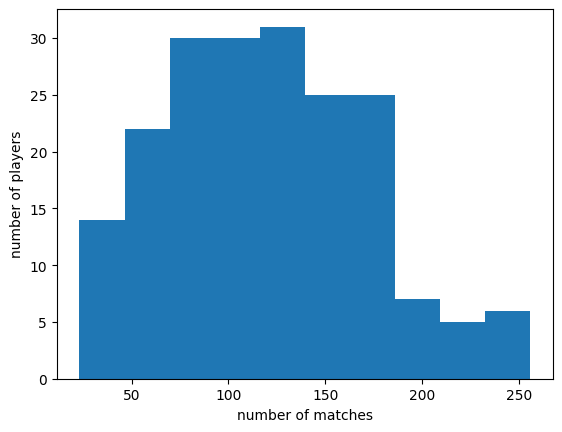

In [83]:
num_matches = []
for name in tqdm(top_200_names):
    p_df = pd.read_pickle(f'{df_root_dir}/{name}.pkl')
    num_matches.append(p_df.shape[0])

plt.hist(num_matches, bins=10)
plt.xlabel('number of matches')
plt.ylabel('number of players')
plt.show()

In [84]:
p_df = pd.read_pickle(f'{df_root_dir}/HugoDellien.pkl')
R_cols = [c for c in list(p_df.columns) if c.startswith('R_') or c.startswith('oR_')]
R_cols

['R_g_s',
 'R_h_s',
 'R_c_s',
 'oR_g_s',
 'oR_h_s',
 'oR_c_s',
 'R_g_r',
 'R_h_r',
 'R_c_r',
 'oR_g_r',
 'oR_h_r',
 'oR_c_r',
 'R_o_s',
 'oR_o_s',
 'R_o_r',
 'oR_o_r',
 'R_g_o',
 'oR_g_o',
 'R_h_o',
 'oR_h_o',
 'R_c_o',
 'oR_c_o',
 'R_o_o',
 'oR_o_o']

In [85]:
def add_one_day(match_str):
    date_str = match_str[:8]
    d = datetime.strptime(date_str, '%Y%m%d') + timedelta(days=1)
    return f"{datetime.strftime(d, '%Y%m%d')}{match_str[8:]}"

p_df = pd.read_pickle(f'{df_root_dir}/NovakDjokovic.pkl')

In [86]:
calls = {'depth': 0}


In [87]:

def update_player(player, up_to_match=None):
    calls['depth'] += 1
    print(f"depth: {calls['depth']}")
    earliest_unprocessed_match = player_progresses[player]
    date, rnd, opp = earliest_unprocessed_match.split('_')
    print(f'player: {player} starting at {date}_{rnd}_{opp}') 
    p_df = pd.read_pickle(f'{df_root_dir}/{player}.pkl')
    p_df = p_df[(p_df['date']>'20201231') & (p_df['formatted_opp'].isin(top_200_names)) & (p_df['surf'].isin(surfs))].reset_index(drop=True)
    starting_index = p_df[(p_df['date'] == date) & (p_df['round'] == rnd) & (p_df['formatted_opp'] == opp)].index
    assert starting_index.shape[0] == 1
    starting_index = starting_index[0]
    end_index = p_df.index[-1]
    K = 64
    c = 400

    if up_to_match is not None:
        date, rnd, opp = up_to_match.split('_')
        end_index = p_df[(p_df['date'] == date) & (p_df['round'] == rnd) & (p_df['formatted_opp'] == opp)].index
        # if end_index.shape[0] != 1:
        #     print('in here')
        assert end_index.shape[0] == 1
        end_index = end_index[0]

    for i in range(starting_index, end_index + 1):
        match = p_df.iloc[i]
        match_id = f"{match['date']}_{match['round']}_{match['formatted_opp']}"
        if match_id == up_to_match:
            calls['depth'] -= 1
            print(f"depth: {calls['depth']}")
            return p_df
        surf = match['surf'][0].lower()
        opp = match['formatted_opp']
        opp_match_id = f"{match['date']}_{match['round']}_{player}"
        opp_df = update_player(opp, opp_match_id)
        opp_match_idx = opp_df[(opp_df['date'] == match['date']) & (opp_df['round'] == match['round']) & (opp_df['formatted_opp'] == player)].index
        assert opp_match_idx.shape[0] == 1
        opp_match_idx = opp_match_idx[0] 

        p_s, p_r, p_o, o_s, o_r, o_o = p_df[f'R_{surf}_s'].iloc[i], p_df[f'R_{surf}_r'].iloc[i], p_df[f'R_{surf}_o'].iloc[i], opp_df[f'R_{surf}_s'].iloc[opp_match_idx], opp_df[f'R_{surf}_r'].iloc[opp_match_idx], opp_df[f'R_{surf}_o'].iloc[opp_match_idx]  
        Q_ps, Q_pr, Q_po, Q_os, Q_or, Q_oo = 10**(p_s/c), 10**(p_r/c),10**(p_o/c), 10**(o_s/c), 10**(o_r/c), 10**(o_o/c)
        E_s, E_r, E_o = Q_ps/(Q_ps + Q_or), Q_pr/(Q_pr + Q_os), Q_po/(Q_po + Q_oo)

        p_os, p_or, p_oo, o_os, o_or, o_oo = p_df[f'R_o_s'].iloc[i], p_df[f'R_o_r'].iloc[i],p_df[f'R_o_o'].iloc[i], opp_df[f'R_o_s'].iloc[opp_match_idx], opp_df[f'R_o_r'].iloc[opp_match_idx], opp_df[f'R_o_o'].iloc[opp_match_idx]  
        Q_ops, Q_opr, Q_opo, Q_oos, Q_oor, Q_ooo = 10**(p_os/c), 10**(p_or/c), 10**(p_oo/c), 10**(o_os/c), 10**(o_or/c), 10**(o_oo/c)
        E_os, E_or, E_oo = Q_ops/(Q_ops + Q_oor), Q_opr/(Q_opr + Q_oos), Q_opo/(Q_opo + Q_ooo)

        for osurf in ['g', 'h', 'c', 'o']:
            p_df.loc[i, f'oR_{osurf}_s'] = opp_df[f'R_{osurf}_s'].iloc[opp_match_idx]
            p_df.loc[i, f'oR_{osurf}_r'] = opp_df[f'R_{osurf}_r'].iloc[opp_match_idx]
            p_df.loc[i, f'oR_{osurf}_o'] = opp_df[f'R_{osurf}_r'].iloc[opp_match_idx]
        p_df.loc[i+1:, f'R_{surf}_s'] = p_df[f'R_{surf}_s'].iloc[i] + K * (p_df['serve_win_rate'].iloc[i] - E_s)
        p_df.loc[i+1:, f'R_{surf}_r'] = p_df[f'R_{surf}_r'].iloc[i] + K * (p_df['return_win_rate'].iloc[i] - E_r)
        p_df.loc[i+1:, f'R_{surf}_o'] = p_df[f'R_{surf}_o'].iloc[i] + K * (int(p_df['win/loss'].iloc[i] == 'W') - E_o)

        p_df.loc[i+1:, f'R_o_s'] = p_df[f'R_o_s'].iloc[i] + K * (p_df['serve_win_rate'].iloc[i] - E_os)
        p_df.loc[i+1:, f'R_o_r'] = p_df[f'R_o_r'].iloc[i] + K * (p_df['return_win_rate'].iloc[i] - E_or)
        p_df.loc[i+1:, f'R_o_o'] = p_df[f'R_o_o'].iloc[i] + K * (int(p_df['win/loss'].iloc[i] == 'W') - E_oo)
        pd.to_pickle(p_df, f'{df_root_dir}/{player}.pkl')
        player_i = min(i+1, end_index)
        print(f"{player}: {p_df['date'].iloc[player_i]}_{p_df['round'].iloc[player_i]}_{p_df['formatted_opp'].iloc[player_i]}")
        print()
        player_progresses[player] = f"{p_df['date'].iloc[player_i]}_{p_df['round'].iloc[player_i]}_{p_df['formatted_opp'].iloc[player_i]}"
    calls['depth'] -= 1
    print(f"depth: {calls['depth']}")
    return p_df


In [88]:
unfinished_players = [n for n,v in player_progresses.items() if v != player_final_matches[n]]
while unfinished_players:
    player = unfinished_players[0]
    update_player(player)
    unfinished_players = [n for n,v in player_progresses.items() if v != player_final_matches[n]]




depth: 1
player: AdamWalton starting at 20211108_R32_DanielAltmaier
depth: 2
player: DanielAltmaier starting at 20210214_R32_JuanManuelCerundolo
depth: 3
player: JuanManuelCerundolo starting at 20210214_R32_DanielAltmaier
depth: 2
DanielAltmaier: 20210214_R16_LukasKlein

depth: 3
player: LukasKlein starting at 20210207_R16_JurijRodionov
depth: 4
player: JurijRodionov starting at 20210131_R32_ArthurRinderknech
depth: 5
player: ArthurRinderknech starting at 20210117_R16_BrandonNakashima
depth: 6
player: BrandonNakashima starting at 20210117_R16_ArthurRinderknech
depth: 5
ArthurRinderknech: 20210117_QF_MarcAndreaHuesler

depth: 6
player: MarcAndreaHuesler starting at 20210117_R16_FacundoBagnis
depth: 7
player: FacundoBagnis starting at 20210117_R32_ZhizhenZhang
depth: 8
player: ZhizhenZhang starting at 20210117_R32_FacundoBagnis
depth: 7
FacundoBagnis: 20210117_R16_MarcAndreaHuesler

depth: 6
MarcAndreaHuesler: 20210117_QF_ArthurRinderknech

depth: 5
ArthurRinderknech: 20210117_SF_JozefKo

In [89]:
daniel_df = pd.read_pickle(f'{df_root_dir}/TaroDaniel.pkl')
nikoloz_df = pd.read_pickle(f'{df_root_dir}/NikolozBasilashvili.pkl')
bublik_df = pd.read_pickle(f'{df_root_dir}/AlexanderBublik.pkl')

In [90]:
players = [n for n,v in player_progresses.items()]
for player in players:
    p_df = pd.read_pickle(f'{df_root_dir}/{player}.pkl')
    last_match = p_df.iloc[-1]
    last_opp = last_match['formatted_opp']
    opp_df = pd.read_pickle(f'{df_root_dir}/{last_opp}.pkl')
    opp_match_idx = opp_df[(opp_df['date'] == last_match['date']) & (opp_df['round'] == last_match['round']) & (opp_df['formatted_opp'] == player)].index
    assert opp_match_idx.shape[0] == 1
    opp_match_idx = opp_match_idx[0]
    opp_match = opp_df.iloc[opp_match_idx]
    for surf in ['g', 'h', 'c', 'o']:
        p_df.loc[p_df.index[-1], f'oR_{surf}_s'] = opp_match[f'R_{surf}_s']
        p_df.loc[p_df.index[-1], f'oR_{surf}_r'] = opp_match[f'R_{surf}_r']
        p_df.loc[p_df.index[-1], f'oR_{surf}_o'] = opp_match[f'R_{surf}_o']
    pd.to_pickle(p_df, f'{df_root_dir}/{player}.pkl')

In [91]:
dellien_df = pd.read_pickle(f'{df_root_dir}/HugoDellien.pkl')
monteiro_df = pd.read_pickle(f'{df_root_dir}/ThiagoMonteiro.pkl')
coria_df = pd.read_pickle(f'{df_root_dir}/FedericoCoria.pkl')
dejong_df = pd.read_pickle(f'{df_root_dir}/JesperDeJong.pkl')

In [ ]:
# backup_all_dfs(top_200_names)

100%|██████████| 195/195 [00:01<00:00, 103.17it/s]


In [93]:
# for player in tqdm(top_200_names):
#     p_df = pd.read_pickle(f'{df_root_dir}/{player}.pkl')
#     for idx, row in p_df.iterrows():
#         opp = row['formatted_opp']
#         opp_df = pd.read_pickle(f'{df_root_dir}/{opp}.pkl')
#         opp_match_num = opp_df.loc[(opp_df['date'] == row['date']) & (opp_df['round'] == row['round']) & (opp_df['formatted_opp'] == player), 'p_matchnum']
#         assert opp_match_num.shape[0] == 1
#         opp_match_num = opp_match_num.iloc[0]
#         p_df.loc[row['p_matchnum'], 'o_matchnum'] = opp_match_num
#     pd.to_pickle(p_df, f'{df_root_dir}/{player}.pkl')

In [94]:
# for player in tqdm(top_200_names):
#     p_df = pd.read_pickle(f'{df_root_dir}/{player}.pkl')
#     p_df['o_matchnum'] = p_df['o_matchnum'].astype(int)
#     pd.to_pickle(p_df, f'{df_root_dir}/{player}.pkl')